In [1]:
import numpy as np
import pandas as pd
np.random.seed(1) # for reproducibility

In [2]:
no_samples = 1000
class_0_ratio = 0.9 
no_of_class_0 = int(no_samples*class_0_ratio)# majority class
no_of_class_1 = 100 # minority class

In [3]:
#class_0_data setup with feature1,2 and target
class_0_data = {'feature1':np.random.normal(0,1,no_of_class_0),
 'feature2':np.random.normal(0,1,no_of_class_0),
 'target':[0]*no_of_class_0}

In [4]:
class_0_df = pd.DataFrame(class_0_data)

In [5]:
class_0_df

,feature1,feature2,target
0,1.624345,-0.446699,0
1,-0.611756,0.204377,0
2,-0.528172,0.612233,0
3,-1.072969,0.744885,0
4,0.865408,-0.036281,0
...,...,...,...
895,0.578464,0.833679,0
896,-0.961264,2.160456,0
897,-1.458324,1.998992,0
898,0.494342,0.764041,0


In [6]:
#class_1_data setup with feature1,2 and target
class_1_df = pd.DataFrame(
    {'feature1':np.random.normal(3,1,no_of_class_1),
 'feature2':np.random.normal(3,1,no_of_class_1),
 'target':[1]*no_of_class_1}
)

In [7]:
class_1_df

,feature1,feature2,target
0,1.692029,3.933630,1
1,4.472396,1.236225,1
2,3.074876,2.589783,1
3,1.213065,2.546333,1
4,3.165211,2.410570,1
...,...,...,...
95,3.213026,3.188583,1
96,2.195458,3.560918,1
97,2.353418,2.078341,1
98,4.138173,3.647375,1


In [8]:
df = pd.concat([class_0_df, class_1_df]).reset_index(drop=True)

In [51]:
df

,feature1,feature2,target
0,1.624345,-0.446699,0
1,-0.611756,0.204377,0
2,-0.528172,0.612233,0
3,-1.072969,0.744885,0
4,0.865408,-0.036281,0
...,...,...,...
995,3.213026,3.188583,1
996,2.195458,3.560918,1
997,2.353418,2.078341,1
998,4.138173,3.647375,1


In [52]:
df.target.value_counts(normalize=True)

# class 0 is at 90% and class 1 is at 10%

target
0    0.9
1    0.1
Name: proportion, dtype: float64

In [10]:
df_minority = df[df.target==1]
df_majority = df[df.target==0]

In [11]:
df_minority

,feature1,feature2,target
900,1.692029,3.933630,1
901,4.472396,1.236225,1
902,3.074876,2.589783,1
903,1.213065,2.546333,1
904,3.165211,2.410570,1
...,...,...,...
995,3.213026,3.188583,1
996,2.195458,3.560918,1
997,2.353418,2.078341,1
998,4.138173,3.647375,1


In [12]:
df_majority

,feature1,feature2,target
0,1.624345,-0.446699,0
1,-0.611756,0.204377,0
2,-0.528172,0.612233,0
3,-1.072969,0.744885,0
4,0.865408,-0.036281,0
...,...,...,...
895,0.578464,0.833679,0
896,-0.961264,2.160456,0
897,-1.458324,1.998992,0
898,0.494342,0.764041,0


In [13]:
# up-sampling >> increase minority data equivalent to majority

from sklearn.utils import resample

In [14]:
df_minority_upsampled = resample(df_minority, replace=True,n_samples=len(df_majority),random_state=1) # up-sampling df_minority to df_majority

In [15]:
df_minority_upsampled

,feature1,feature2,target
937,2.253776,1.681477,1
912,2.448320,2.898619,1
972,2.541698,2.700847,1
909,1.724886,1.748043,1
975,2.427974,4.613562,1
...,...,...,...
936,4.093307,2.373543,1
998,4.138173,3.647375,1
901,4.472396,1.236225,1
932,1.965537,4.084419,1


In [16]:
df_minority_upsampled.duplicated().sum() # so 800 data points were added   

800

In [17]:
df_unsampled = pd.concat([df_majority,df_minority_upsampled])

In [18]:
df_unsampled

,feature1,feature2,target
0,1.624345,-0.446699,0
1,-0.611756,0.204377,0
2,-0.528172,0.612233,0
3,-1.072969,0.744885,0
4,0.865408,-0.036281,0
...,...,...,...
936,4.093307,2.373543,1
998,4.138173,3.647375,1
901,4.472396,1.236225,1
932,1.965537,4.084419,1


In [19]:
df_unsampled.target.value_counts()

target
0    900
1    900
Name: count, dtype: int64

In [20]:
# undersmapling >> reduce the data points in majority class equivalent to minority class

df_majority_downsampled = resample(df_majority, replace=False,n_samples=len(df_minority),random_state=1) # down-sampling df_majority to df_minority

In [21]:
df_majority_downsampled

,feature1,feature2,target
860,-0.977773,0.872579,0
880,0.309817,1.835870,0
874,0.050317,0.146532,0
780,0.677808,-0.859827,0
525,0.713049,0.320971,0
...,...,...,...
494,-1.579156,2.711950,0
255,-1.044589,0.522655,0
672,0.410266,0.683356,0
481,-1.114871,-0.800787,0


In [22]:
df_downsampled = pd.concat([df_majority_downsampled,df_minority])

In [23]:
df_downsampled

,feature1,feature2,target
860,-0.977773,0.872579,0
880,0.309817,1.835870,0
874,0.050317,0.146532,0
780,0.677808,-0.859827,0
525,0.713049,0.320971,0
...,...,...,...
995,3.213026,3.188583,1
996,2.195458,3.560918,1
997,2.353418,2.078341,1
998,4.138173,3.647375,1


In [24]:
# SMOTE >> synthetic minority oversampling technique

In [25]:
from sklearn.datasets import make_classification

In [58]:
x, y = make_classification(n_samples=1000, n_redundant=0, n_features=2, n_clusters_per_class=1, weights=[0.90], random_state=1)

In [ ]:
x,y

In [60]:
len(x),len(y)

(1000, 1000)

In [28]:
len(y[y==0])

894

In [29]:
len(y[y==1])

106

In [66]:
pd.DataFrame(x)

,0,1
0,1.536830,-1.398694
1,1.551108,1.810329
2,1.293619,1.010946
3,1.119889,1.632518
4,1.042356,1.121529
...,...,...
995,2.210439,2.006772
996,1.910941,2.011860
997,-0.556625,-0.159837
998,1.004999,0.936290


In [65]:
pd.DataFrame(y)

,0
0,1
1,0
2,0
3,0
4,0
...,...
995,0
996,0
997,0
998,0


In [67]:
df1= pd.DataFrame(x ,columns=['f1','f2'])
df2= pd.DataFrame(y ,columns=['target'])
df_final = pd.concat([df1,df2],axis=1)

In [68]:
df_final

,f1,f2,target
0,1.536830,-1.398694,1
1,1.551108,1.810329,0
2,1.293619,1.010946,0
3,1.119889,1.632518,0
4,1.042356,1.121529,0
...,...,...,...
995,2.210439,2.006772,0
996,1.910941,2.011860,0
997,-0.556625,-0.159837,0
998,1.004999,0.936290,0


In [69]:
df_final.target.value_counts()

target
0    894
1    106
Name: count, dtype: int64

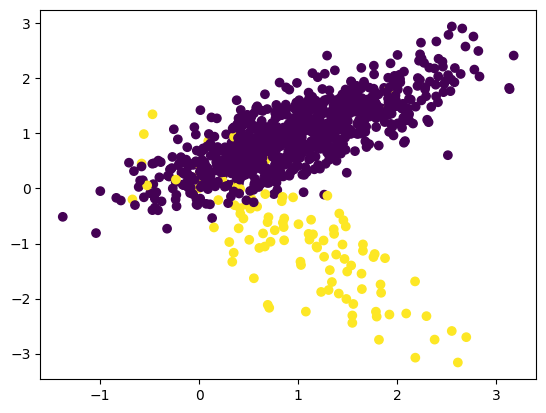

In [70]:
import matplotlib.pyplot as plt
plt.scatter(df_final['f1'],df_final['f2'],c=df_final['target'])

In [34]:
# SMOTE
from imblearn.over_sampling import SMOTE

In [35]:
oversample = SMOTE()

In [71]:
x,y = oversample.fit_resample(df_final[['f1','f2']],df_final['target'])

In [72]:
x,y

(            f1        f2
 0     1.536830 -1.398694
 1     1.551108  1.810329
 2     1.293619  1.010946
 3     1.119889  1.632518
 4     1.042356  1.121529
 ...        ...       ...
 1783  0.669604 -0.958811
 1784  2.657610 -2.925737
 1785 -0.485098  1.221763
 1786 -0.551956  1.010005
 1787  0.452419 -0.304899
 
 [1788 rows x 2 columns],
 0       1
 1       0
 2       0
 3       0
 4       0
        ..
 1783    1
 1784    1
 1785    1
 1786    1
 1787    1
 Name: target, Length: 1788, dtype: int32)

In [73]:
x.shape

(1788, 2)

In [74]:
y.shape

(1788,)

In [75]:
y[y==0]

1      0
2      0
3      0
4      0
5      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: target, Length: 894, dtype: int32

In [76]:
y[y==1]

0       1
8       1
14      1
17      1
20      1
       ..
1783    1
1784    1
1785    1
1786    1
1787    1
Name: target, Length: 894, dtype: int32

In [77]:
df1= pd.DataFrame(x ,columns=['f1','f2'])
df2= pd.DataFrame(y ,columns=['target'])
df_smote = pd.concat([df1,df2],axis=1)

In [43]:
df_smote

,f1,f2,target
0,1.536830,-1.398694,1
1,1.551108,1.810329,0
2,1.293619,1.010946,0
3,1.119889,1.632518,0
4,1.042356,1.121529,0
...,...,...,...
1783,0.379066,0.905933,1
1784,1.756310,-2.345462,1
1785,2.334889,-2.820627,1
1786,1.104103,-0.147551,1


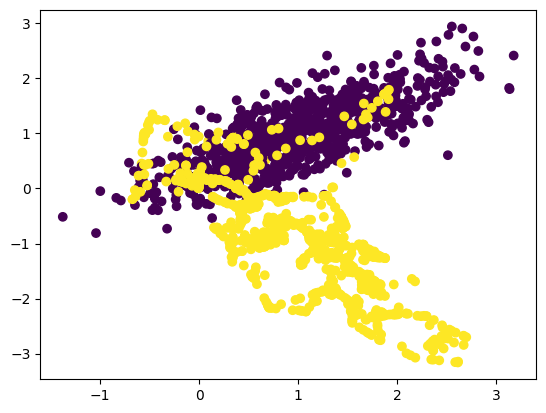

In [44]:
plt.scatter(df_smote['f1'],df_smote['f2'],c=df_smote['target'])